# Data Cleaning 
### choose comapny to analyze 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import csv
import ast

from google.colab import drive
drive.mount('/content/drive')

csv_file = "/content/drive/MyDrive/bq-results-score.csv"
company_name = 'APPLE'


def clean_data(input):
  with open(input, 'r') as file:
      csv_reader = csv.reader(file)
      head_rows = []
      column_names = next(csv_reader)
      for row in csv_reader:
          head_rows.append(row)


  dff = pd.DataFrame(head_rows, columns = column_names)
  
  #print(dff)
  dff['SCORE'] = dff['SCORE'].astype(int)

  dff = dff.drop_duplicates(subset=['DOCUMENT_ID', 'THREAT'])

  return dff


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Analytics

## Assigning input varablies 

In [ ]:
# Subcatagory Substrings
GHG_PRO_substrings = ['EMISSIONS_PRO']
Energy_PRO_substrings = ['ENERGY_PRO']
Waste_PRO_substrings = ['WATER_PRO','WASTE_PRO', 'TOXIC_CHEMICALS_PRO', 'RECYCLING_PRO']
Sustainability_PRO_substrings = ['NATURE_ENVIRONMENT_PRO', 'RESOURCES_PRO', 'PACKAGING_PRO', 'TRANSPORTATION_PRO',
                                'CONSUMPTION_PRO', 'FASHION_PRO']
Biodiversity_PRO_substrings = ['FOREST_PRO', 'ANIMALS_PRO', 'AGRICULTURE_PRO', 'BIODIVERSITY_PRO']
Equality_PRO_substrings = ['WORKPLACE_PRO', 'WORKPLACE_DIVERSITY_PRO', 'WORKPLACE_DISCRIMINATION_PRO', 'WOMEN_PRO', 'DIVERSITY_PRO']
Local_Support_PRO_substrings = ['COMMUNITY_PRO', 'STARTUPS_PRO', 'COMMUNITY_WELFARE', 'LOCAL_BUSINESS_SUPPLIERS_PRO']
Labor_Rights_PRO_substrings = ['HUMAN_WORKPLACE_PRO', 'MODERN_SLAVERY_PRO', 'LABOR_RIGHTS_PRO', 'ASSOCIATION_UNIONS_PRO', 'HOURS_WAGES_PRO',
                              'CHILD_LABOR_PRO', 'HEALTH_SAFETY_PRO', 'WORKER_TRAINING_PRO', 'HUMAN_PRO', 'FORCED_MARRIAGE_PRO',
                              'CHILD_MARRIAGE_PRO', 'TRAINING_EDUCATION_PRO']
Customer_Rights_PRO_substrings = ['DATA_PRIVACY_PRO', 'GREEN_MARKETING_PRO']
Proper_Management_PRO_substrings = ['WHISTLEBLOWING_RETALIATION_PRO', 'ETHICS_COMPLIANCE_PRO']
Sustainability_Efforts_PRO_substrings = ['TRANSPARENCY_TRACEABILITY_PRO', 'SUPPLY_CHAIN_PRO']
Anti_Corruption_PRO_substrings = ['BUSINESS_PRO', 'RETALIATION_PRO', 'CORRUPTION_PRO', 'ANTICOMPETITIVE_BEHAVIOR_PRO', 'FAIR_TRADE_PRO']
Political_Influence_PRO_substrings = ['CONFLICT_COMMODITIES_PRO', 'INNOVATION_RD_PRO', 'RESPONSIBLE_PURCHASING_PRACTICES','PRODUCT_PRO',
                                      'DONATION_SPONSORSHIP_PRO', 'INITIATIVES_PRO', 'TERRORISM_SUPPORT_PRO']
GHG_CONTRA_substrings = ['EMISSIONS_CONTRA']
Energy_CONTRA_substrings = ['ENERGY_CONTRA']
Waste_CONTRA_substrings = ['WATER_CONTRA', 'WATER_CONTAMINATION', 'WASTE_CONTRA', 'MERCURY_CONTRA', 'POP_TOXIC_CHEMICALS_CONTRA',
                          'PACKAGING_CONTRA', 'OVERPRODUCTION', 'RECYCLING_CONTRA']
Sustainability_CONTRA_substrings = ['NATURE_ENVIRONMENT_CONTRA', 'RESOURCES_CONTRA', 'TRANSPORTATION_CONTRA',
                                    'CONSUMPTION_CONTRA', 'FASHION_CONTRA']
Biodiversity_CONTRA_substrings = ['FOREST_CONTRA', 'ANIMALS_CONTRA', 'LABORATORY_ANIMALS_NEGLIGENCE',
                                  'AGRICULTURE_CONTRA', 'BIODIVERSITY_CONTRA']
Equality_CONTRA_substrings = ['WORKPLACE_DISCRIMINATION_CONTRA', 'WOMEN_CONTRA', 'LAND_CONTRA', 'DIVERSITY_CONTRA']
Local_Support_CONTRA_substrings = ['COMMUNITY_CONTRA']
Labor_Rights_CONTRA_substrings = ['HUMAN_WORKPLACE_CONTRA', 'WORKPLACE_CONTRA', 'MODERN_SLAVERY_CONTRA', 'FORCED_LABOR_CONTRA',
                                  'BONDED_LABOR_CONTRA', 'CHILD_SLAVERY_CONTRA', 'LABOR_RIGHTS_CONTRA', 'ASSOCIATION_UNIONS_CONTRA',
                                  'HOURS_WAGES_CONTRA', 'WORKPLACE_ABUSE', 'CHILD_LABOR_CONTRA', 'HEALTH_SAFETY_CONTRA'
                                  'WORKER_TRAINING_CONTRA', 'HUMAN_CONTRA', 'FORCED_MARRIAGE_CONTRA', 'CHILD_MARRIAGE_CONTRA', 'SEX_TRAFFICKING_CONTRA']
Customer_Rights_CONTRA_substrings = ['DATA_PRIVACY_CONTRA']
Proper_Management_CONTRA_substrings = ['WHISTLEBLOWING_RETALIATION_CONTRA', 'EMPLOYEE_NEGLIGENCE_CONTRA', 'USE_OF_SECURITY_FORCES_CONTRA', 'ETHICS_COMPLIANCE_CONTRA']
Sustainability_Efforts_CONTRA_substrings = ['TRANSPARENCY_TRACEABILITY_CONTRA', 'PRODUCT_CONTRA', 'MARKET_NEGLIGENCE',
                                            'SUPPLY_CHAIN_CONTRA', 'POPULATION_CONTRA']
Anti_Corruption_CONTRA_substrings = ['BUSINESS_CONTRA', 'RETALIATION_CONTRA', 'CORRUPTION_CONTRA', 'ANTICOMPETITIVE_BEHAVIOR_CONTRA']
Political_Influence_CONTRA_substrings = ['CONFLICT_COMMODITIES_CONTRA', 'TERRORISM_SUPPORT_CONTRA']






## calc_ESG: calculate and assigns scores for overall ESG, subcategories, and "subsubcategories" 

In [ ]:
from IPython.utils.text import string
def calc_ESG(company_name, dff):

  # Scores per Category (PRO/CON)
  GHG_PRO = 0
  Energy_PRO = 0
  Waste_PRO = 0
  Sustainability_PRO = 0
  Biodiversity_PRO = 0
  Equality_PRO = 0
  Local_Support_PRO = 0
  Labor_Rights_PRO = 0
  Customer_Rights_PRO = 0
  Proper_Management_PRO = 0
  Sustainability_Efforts_PRO = 0
  Anti_Corruption_PRO = 0
  Political_Influence_PRO = 0
  GHG_CONTRA = 0
  Energy_CONTRA= 0
  Waste_CONTRA = 0
  Sustainability_CONTRA = 0
  Biodiversity_CONTRA = 0
  Equality_CONTRA = 0
  Local_Support_CONTRA = 0
  Labor_Rights_CONTRA = 0
  Customer_Rights_CONTRA = 0
  Proper_Management_CONTRA = 0
  Sustainability_Efforts_CONTRA = 0
  Anti_Corruption_CONTRA = 0
  Political_Influence_CONTRA = 0

  # Articles per subcatageory (PRO/CON)
  GHG_PRO_Articles = 0
  Energy_PRO_Articles = 0
  Waste_PRO_Articles = 0
  Sustainability_PRO_Articles = 0
  Biodiversity_PRO_Articles = 0
  Equality_PRO_Articles = 0
  Local_Support_PRO_Articles = 0
  Labor_Rights_PRO_Articles = 0
  Customer_Rights_PRO_Articles = 0
  Proper_Management_PRO_Articles = 0
  Sustainability_Efforts_PRO_Articles = 0
  Anti_Corruption_PRO_Articles = 0
  Political_Influence_PRO_Articles = 0
  GHG_CONTRA_Articles = 0
  Energy_CONTRA_Articles = 0
  Waste_CONTRA_Articles = 0
  Sustainability_CONTRA_Articles = 0
  Biodiversity_CONTRA_Articles = 0
  Equality_CONTRA_Articles = 0
  Local_Support_CONTRA_Articles = 0
  Labor_Rights_CONTRA_Articles = 0
  Customer_Rights_CONTRA_Articles = 0
  Proper_Management_CONTRA_Articles = 0
  Sustainability_Efforts_CONTRA_Articles = 0
  Anti_Corruption_CONTRA_Articles = 0
  Political_Influence_CONTRA_Articles = 0


  subsub = {}
  subsub_count = {}
  # Iterate through the data frame and assign scores
  for index, row in dff.iterrows():
      if company_name in row['COMPANY']:
          threat = row['THREAT']
          score = row['SCORE']

          if threat not in subsub:
            subsub[threat] = score
            subsub_count[threat] = 1
          else:
            subsub[threat] += score
            subsub_count[threat] += 1
          if any(substring in threat for substring in GHG_PRO_substrings):
              GHG_PRO += score
              GHG_PRO_Articles += 1
          elif any(substring in threat for substring in Energy_PRO_substrings):
              Energy_PRO += score
              Energy_PRO_Articles += 1
          elif any(substring in threat for substring in Waste_PRO_substrings):
              Waste_PRO += score
              Waste_PRO_Articles += 1
          elif any(substring in threat for substring in Sustainability_PRO_substrings):
              Sustainability_PRO += score
              Sustainability_PRO_Articles += 1
          elif any(substring in threat for substring in Biodiversity_PRO_substrings):
              Biodiversity_PRO += score
              Biodiversity_PRO_Articles += 1
          elif any(substring in threat for substring in Equality_PRO_substrings):
              Equality_PRO += score
              Equality_PRO_Articles += 1
          elif any(substring in threat for substring in Local_Support_PRO_substrings):
              Local_Support_PRO += score
              Local_Support_PRO_Articles += 1
          elif any(substring in threat for substring in Labor_Rights_PRO_substrings):
              Labor_Rights_PRO += score
              Labor_Rights_PRO_Articles += 1
          elif any(substring in threat for substring in Customer_Rights_PRO_substrings):
              Customer_Rights_PRO += score
              Customer_Rights_PRO_Articles += 1
          elif any(substring in threat for substring in Proper_Management_PRO_substrings):
              Proper_Management_PRO += score
              Proper_Management_PRO_Articles += 1
          elif any(substring in threat for substring in Sustainability_Efforts_PRO_substrings):
              Sustainability_Efforts_PRO += score
              Sustainability_Efforts_PRO_Articles += 1
          elif any(substring in threat for substring in Anti_Corruption_PRO_substrings):
              Anti_Corruption_PRO += score
              Anti_Corruption_PRO_Articles += 1
          elif any(substring in threat for substring in Political_Influence_PRO_substrings):
              Political_Influence_PRO += score
              Political_Influence_PRO_Articles += 1
          elif any(substring in threat for substring in GHG_CONTRA_substrings):
              GHG_CONTRA += score
              GHG_CONTRA_Articles += 1
          elif any(substring in threat for substring in Energy_CONTRA_substrings):
              Energy_CONTRA += score
              Energy_CONTRA_Articles += 1
          elif any(substring in threat for substring in Waste_CONTRA_substrings):
              Waste_CONTRA += score
              Waste_CONTRA_Articles += 1
          elif any(substring in threat for substring in Sustainability_CONTRA_substrings):
              Sustainability_CONTRA += score
              Sustainability_CONTRA_Articles += 1
          elif any(substring in threat for substring in Biodiversity_CONTRA_substrings):
              Biodiversity_CONTRA += score
              Biodiversity_CONTRA_Articles += 1
          elif any(substring in threat for substring in Equality_CONTRA_substrings):
              Equality_CONTRA += score
              Equality_CONTRA_Articles += 1
          elif any(substring in threat for substring in Local_Support_CONTRA_substrings):
              Local_Support_CONTRA += score
              Local_Support_CONTRA_Articles += 1
          elif any(substring in threat for substring in Labor_Rights_CONTRA_substrings):
              Labor_Rights_CONTRA += score
              Labor_Rights_CONTRA_Articles += 1
          elif any(substring in threat for substring in Customer_Rights_CONTRA_substrings):
              Customer_Rights_CONTRA += score
              Customer_Rights_CONTRA_Articles += 1
          elif any(substring in threat for substring in Proper_Management_CONTRA_substrings):
              Proper_Management_CONTRA += score
              Proper_Management_CONTRA_Articles += 1
          elif any(substring in threat for substring in Sustainability_Efforts_CONTRA_substrings):
              Sustainability_Efforts_CONTRA += score
              Sustainability_Efforts_CONTRA_Articles += 1
          elif any(substring in threat for substring in Anti_Corruption_CONTRA_substrings):
              Anti_Corruption_CONTRA += score
              Anti_Corruption_CONTRA_Articles += 1
          elif any(substring in threat for substring in Political_Influence_CONTRA_substrings):
              Political_Influence_CONTRA += score
              Political_Influence_CONTRA_Articles += 1

  # Enviroment (5)
  if GHG_PRO_Articles + GHG_CONTRA_Articles== 0:
    GHG = -100
  else:
    GHG = (GHG_PRO - GHG_CONTRA) / (GHG_PRO_Articles + GHG_CONTRA_Articles)
  if Energy_PRO_Articles + Energy_CONTRA_Articles == 0:
    Energy = -100
  else:
    Energy = (Energy_PRO - Energy_CONTRA) / (Energy_PRO_Articles + Energy_CONTRA_Articles)
  if Waste_PRO_Articles + Waste_CONTRA_Articles== 0:
    Waste = -100
  else:
    Waste = (Waste_PRO - Waste_CONTRA) / (Waste_PRO_Articles + Waste_CONTRA_Articles)
  if Sustainability_PRO_Articles + Sustainability_CONTRA_Articles == 0:
    Sustainability = -100
  else:
    Sustainability = (Sustainability_PRO - Sustainability_CONTRA) / (Sustainability_PRO_Articles + Sustainability_CONTRA_Articles)
  if Biodiversity_PRO_Articles + Biodiversity_CONTRA_Articles== 0:
    Biodiversity = -100
  else:
    Biodiversity = (Biodiversity_PRO - Biodiversity_CONTRA) / (Biodiversity_PRO_Articles + Biodiversity_CONTRA_Articles)

  # Social (4)
  if Equality_PRO_Articles + Equality_CONTRA_Articles== 0:
    Equality = -100
  else:
    Equality = (Equality_PRO - Equality_CONTRA) / (Equality_PRO_Articles + Equality_CONTRA_Articles)
  if Local_Support_PRO_Articles + Local_Support_CONTRA_Articles== 0:
    Local_Support = -100
  else:
    Local_Support = (Local_Support_PRO - Local_Support_CONTRA) / (Local_Support_PRO_Articles + Local_Support_CONTRA_Articles)
  if Labor_Rights_PRO_Articles + Labor_Rights_CONTRA_Articles== 0:
    Labor_Rights = -100
  else:
    Labor_Rights = (Labor_Rights_PRO - Labor_Rights_CONTRA) / (Labor_Rights_PRO_Articles + Labor_Rights_CONTRA_Articles)
  if Customer_Rights_PRO_Articles + Customer_Rights_CONTRA_Articles== 0:
    Customer_Rights = -100
  else:
    Customer_Rights = (Customer_Rights_PRO - Customer_Rights_CONTRA) / (Customer_Rights_PRO_Articles + Customer_Rights_CONTRA_Articles)

  # Governance (4)
  if Proper_Management_PRO_Articles + Proper_Management_CONTRA_Articles == 0:
    Proper_Management = -100
  else:
    Proper_Management = (Proper_Management_PRO - Proper_Management_CONTRA) / (Proper_Management_PRO_Articles + Proper_Management_CONTRA_Articles)
  if Sustainability_Efforts_PRO_Articles + Sustainability_Efforts_CONTRA_Articles== 0:
    Sustainability_Efforts = -100
  else:
    Sustainability_Efforts = (Sustainability_Efforts_PRO - Sustainability_Efforts_CONTRA) / (Sustainability_Efforts_PRO_Articles + Sustainability_Efforts_CONTRA_Articles)
  if Anti_Corruption_PRO_Articles + Anti_Corruption_CONTRA_Articles== 0:
    Anti_Corruption = -100
  else:
    Anti_Corruption = (Anti_Corruption_PRO - Anti_Corruption_CONTRA) / (Anti_Corruption_PRO_Articles + Anti_Corruption_CONTRA_Articles)
  if Political_Influence_PRO_Articles + Political_Influence_CONTRA_Articles== 0:
    Political_Influence = -100
  else:
    Political_Influence = (Political_Influence_PRO - Political_Influence_CONTRA) / (Political_Influence_PRO_Articles + Political_Influence_CONTRA_Articles)

  # change scale from (-100 to 100) --> (0 to 100)

  # Enviroment (5)
  GHG = ((GHG + 100) / 2)
  Energy = ((Energy + 100) / 2)
  Waste = ((Waste + 100) / 2)
  Sustainability = ((Sustainability + 100) / 2)
  Biodiversity = ((Biodiversity + 100) / 2)

  # Social (4)
  Equality = ((Equality + 100) / 2)
  Local_Support = ((Local_Support + 100) / 2)
  Labor_Rights = ((Labor_Rights + 100) / 2)
  Customer_Rights = ((Customer_Rights + 100) / 2)

  # Governance (4)
  Proper_Management = ((Proper_Management + 100) / 2)
  Sustainability_Efforts = ((Sustainability_Efforts + 100) / 2)
  Anti_Corruption = ((Anti_Corruption + 100) / 2)
  Political_Influence = ((Political_Influence + 100) / 2)

    # Return the scores

  GHG_Articles = GHG_PRO_Articles+GHG_CONTRA_Articles
  Energy_Articles = Energy_PRO_Articles+Energy_CONTRA_Articles
  Waste_Articles = Waste_PRO_Articles+Waste_CONTRA_Articles
  Sustainability_Articles = Sustainability_PRO_Articles+Sustainability_CONTRA_Articles
  Biodiversity_Articles = Biodiversity_PRO_Articles+Biodiversity_CONTRA_Articles

  Equality_Articles = Equality_PRO_Articles+Equality_CONTRA_Articles
  Local_Support_Articles = Local_Support_PRO_Articles+Local_Support_CONTRA_Articles
  Labor_Rights_Articles = Labor_Rights_PRO_Articles+Labor_Rights_CONTRA_Articles
  Customer_Rights_Articles = Customer_Rights_PRO_Articles+Customer_Rights_CONTRA_Articles

  Proper_Management_Articles = Proper_Management_PRO_Articles+Proper_Management_CONTRA_Articles
  Sustainability_Efforts_Articles = Sustainability_Efforts_PRO_Articles+Sustainability_Efforts_CONTRA_Articles
  Anti_Corruption_Articles = Anti_Corruption_PRO_Articles+Anti_Corruption_CONTRA_Articles
  Political_Influence_Articles = Political_Influence_PRO_Articles+Political_Influence_CONTRA_Articles

  # Making Eqaution Varabiles
  Be = GHG_PRO + Energy_PRO + Waste_PRO + Sustainability_PRO + Biodiversity_PRO
  Bs = Equality_PRO + Local_Support_PRO + Labor_Rights_PRO + Customer_Rights_PRO
  Bg = Proper_Management_PRO + Sustainability_Efforts_PRO + Anti_Corruption_PRO + Political_Influence_PRO
  De = GHG_CONTRA + Energy_CONTRA + Waste_CONTRA + Sustainability_CONTRA + Biodiversity_CONTRA
  Ds = Equality_CONTRA + Local_Support_CONTRA + Labor_Rights_CONTRA + Customer_Rights_CONTRA
  Dg = Proper_Management_CONTRA + Sustainability_Efforts_CONTRA + Anti_Corruption_CONTRA + Political_Influence_CONTRA
  APCe = GHG_Articles + Energy_Articles + Waste_Articles + Sustainability_Articles + Biodiversity_Articles
  APCs = Equality_Articles + Local_Support_Articles + Labor_Rights_Articles + Customer_Rights_Articles
  APCg = Proper_Management_Articles + Sustainability_Efforts_Articles + Anti_Corruption_Articles + Political_Influence_Articles


# Calculate E, S, G Scores 
  if APCe == 0:
    Environment = -100
  else:
    Environment = (Be - De) / APCe
  if APCs == 0:
    Social = -100
  else:
    Social = (Bs - Ds) / APCs
  if APCg == 0:
    Governance = -100
  else:
    Governance = (Bg - Dg) / APCg

  # change scale from (-100 to 100) --> (0 to 100)
  Environment = ((Environment + 100) / 2)
  Social = ((Social + 100) / 2)
  Governance = ((Governance + 100) / 2)

  for key in subsub.keys():
    if subsub_count[key] == 0:
      subsub[key] = 0
    else:
      subsub[key] /= subsub_count[key]

# THE ESG SCORE!!!!
  ESG_Index = (1/3) * (Environment + Social + Governance)

  # return all

  count = {'GHG':GHG_Articles,
           'Energy': Energy_Articles,
           'Waste': Waste_Articles,
           'Sustainability' : Sustainability_Articles,
           'Biodiversity': Biodiversity_Articles,
           'Equality': Equality_Articles,
           'Local_Support': Local_Support_Articles,
           'Labor_Rights': Labor_Rights_Articles,
           'Customer_Rights': Customer_Rights_Articles,
           'Proper_Management': Proper_Management_Articles,
           'Sustainability_Efforts': Sustainability_Efforts_Articles,
           'Anti_Corruption': Anti_Corruption_Articles,
           'Political_Influence': Political_Influence_Articles}

  return {'subsub' :  subsub,
          'subsub_count':subsub_count,
          'count': count,
          'ESG_Index': ESG_Index,
          'Environment': Environment,
          'Social': Social,
          'Governance': Governance,
          'GHG': GHG,
          'Energy': Energy,
          'Waste' : Waste,
          'Sustainability' : Sustainability,
          'Biodiversity' : Biodiversity,
          'Equality' : Equality,
          'Local_Support': Local_Support,
          'Labor_Rights' : Labor_Rights,
          'Customer_Rights' : Customer_Rights,
          'Proper_Management' : Proper_Management,
          'Sustainability_Efforts' : Sustainability_Efforts,
          'Anti_Corruption' : Anti_Corruption,
          'Political_Influence' : Political_Influence}

# Visiualize

## Overall Bubble Plot

In [ ]:
def bubble_plot(input, company):


  plt.figure(figsize=(34, 12))

  From = ['OVERALL\nESG\nINDEX', 'OVERALL\nESG\nINDEX', 'OVERALL\nESG\nINDEX', 'Environment', 'Environment', 'Environment', 'Environment', 'Environment', 'Social', 'Social', 'Social', 'Social', 'Governance', 'Governance', 'Governance', 'Governance']
  To = ['Environment', 'Social', 'Governance', 'Greenhouse\nGases', 'Energy', 'Waste', 'Sustainability', 'Biodiversity', 'Equality', 'Local\nSupport', 'Labor\nRights', 'Customer\nRights', 'Proper\nManagement', 'Sustainability\nEfforts', 'Anti\nCorruption', 'Political\nInfluence']

  df = pd.DataFrame({'source': From, 'target': To})

  pos = {'OVERALL\nESG\nINDEX':(122.5, 130),
        'Environment': (50, 90), 'Social': (122.5, 90), 'Governance':(187.5, 90),
        'Greenhouse\nGases': (50, 40), 'Energy':(35, 40), 'Waste': (80, 40), 'Sustainability':(65,40), 'Biodiversity': (20,40),
          'Equality': (115, 40), 'Local\nSupport': (145, 40), 'Labor\nRights':(130,40), 'Customer\nRights':(100, 40),
          'Proper\nManagement': (195, 40), 'Sustainability\nEfforts':(210,40), 'Anti\nCorruption':(165,40), 'Political\nInfluence':(180, 40) }

  Edge_key = ['OVERALL\nESG\nINDEX', 'Environment', 'Social', 'Governance', 'Greenhouse\nGases', 'Energy', 'Waste', 'Sustainability', 'Biodiversity', 'Equality', 'Local\nSupport', 'Labor\nRights', 'Customer\nRights', 'Proper\nManagement', 'Sustainability\nEfforts', 'Anti\nCorruption', 'Political\nInfluence']
  Edge_key2 = ['ESG_Index', 'Environment', 'Social', 'Governance', 'GHG', 'Energy', 'Waste', 'Sustainability', 'Biodiversity', 'Equality', 'Local_Support', 'Labor_Rights', 'Customer_Rights', 'Proper_Management', 'Sustainability_Efforts', 'Anti_Corruption', 'Political_Influence']


  G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph())

  Circles = list(G.nodes)

  attrs = {}
  Colors = []

  data = clean_data(input)

  #print(data)
  res = calc_ESG(company, data)
  weights = [res[val] for val in Edge_key2]

  vals = {}


  print(vals)


  for lab, lab2, weight in zip(Edge_key, Edge_key2, weights):
    if lab2 == 'ESG_Index':
      if np.sum(np.array(res['count'].values())) == 0:
        attrs[lab] = {'weight': 'NoData'}
        Colors.append('grey')
    elif lab2 == 'Environment':
      #print(res['count'].values())
      if np.sum(list(res['count'].values())[0:5]) == 0:
        attrs[lab] = {'weight': 'NoData'}
        Colors.append('grey')
    elif lab2 == 'Social':
      if np.sum(list(res['count'].values())[5:9]) == 0:
        attrs[lab] = {'weight': 'NoData'}
        Colors.append('grey')
    elif lab2 == 'Governance':
      if np.sum(list(res['count'].values())[9:]) == 0:
        attrs[lab] = {'weight': 'NoData'}
        Colors.append('grey')
    elif res['count'][lab2] == 0:
      attrs[lab] = {'weight': 'NoData'}
      Colors.append('grey')
    if lab not in attrs:
      attrs[lab] = {'weight': round(weight, 2)}
      if weight > 90:
          Colors.append('#313695')
      elif weight > 80:
          Colors.append('#4575b4')
      elif weight > 70:
          Colors.append('#74add1')
      elif weight > 60:
          Colors.append('#abd9e9')
      elif weight > 50:
          Colors.append('#e0f3f8')
      elif weight > 40:
          Colors.append('#fee090')
      elif weight > 30:
          Colors.append('#fdae61')
      elif weight > 20:
          Colors.append('#f46d43')
      elif weight > 10:
          Colors.append('#d73027')
      else:
          Colors.append('#a50026')


  #print(attrs)
  nx.set_node_attributes(G, attrs)

  Labels = {}


  for lab in Edge_key:
    if attrs[lab]['weight'] == 'NoData':
      Labels[lab] = lab+"\n"+ r"$\it{{{}}}$".format(str(attrs[lab]['weight']).replace(' ', r'\;'))
    else:
      Labels[lab] = lab+"\n"+ r"$\it{{{}}}$".format(str(attrs[lab]['weight']).replace(' ', r'\;'))+'%'




  nx.draw_networkx_nodes(G, pos, nodelist=Circles, node_size=1.5e4, node_shape='o', edgecolors='white', node_color=Colors)
  nx.draw_networkx_nodes(G, pos, nodelist=Circles, node_size=8e3, node_shape='o', edgecolors='white', node_color='white')
  nx.draw_networkx_labels(G, pos, Labels, font_size=11, font_color='black', font_weight='bold')
  nx.draw_networkx_edges(G, pos, connectionstyle='arc', style='dashed', edge_color = 'silver')

  plt.xlim(0, 220)
  plt.ylim(0, 170)
  plt.axis('off')
  plt.savefig(company+"_bubble_600.png", dpi=600)
  plt.show()

## Subcategory Bubble Plot

In [ ]:
def bubble_plot_Sub(input, company, cat):


  plt.figure(figsize=(17, 8))
  if cat == 'E':
    From = ['Environment', 'Environment', 'Environment', 'Environment', 'Environment']
    To = ['Greenhouse\nGases', 'Energy', 'Waste', 'Sustainability', 'Biodiversity']


    pos = {'Environment': (60, 90),
          'Greenhouse\nGases': (60, 40), 'Energy':(45, 40), 'Waste': (90, 40), 'Sustainability':(75,40), 'Biodiversity': (30,40)}


    Edge_key = ['Environment', 'Greenhouse\nGases', 'Energy', 'Waste', 'Sustainability', 'Biodiversity']
    Edge_key2 = ['Environment', 'GHG', 'Energy', 'Waste', 'Sustainability', 'Biodiversity']
  elif cat == 'S':
    From = [ 'Social', 'Social', 'Social', 'Social']
    To = ['Equality', 'Local\nSupport', 'Labor\nRights', 'Customer\nRights']

    pos = {'Social': (60, 90),
          'Equality': (52.5, 40), 'Local\nSupport': (82.5, 40), 'Labor\nRights':(67.5,40), 'Customer\nRights':(37.5, 40)}


    Edge_key = ['Social', 'Equality', 'Local\nSupport', 'Labor\nRights', 'Customer\nRights']
    Edge_key2 = ['Social', 'Equality', 'Local_Support', 'Labor_Rights', 'Customer_Rights']
  else:
    From = ['Governance', 'Governance', 'Governance', 'Governance']
    To = ['Proper\nManagement', 'Sustainability\nEfforts', 'Anti\nCorruption', 'Political\nInfluence']

    pos = {'Governance':(60, 90),
            'Proper\nManagement': (67.5, 40), 'Sustainability\nEfforts':(82.5,40), 'Anti\nCorruption':(37.5,40), 'Political\nInfluence':(52.5, 40) }


    Edge_key = ['Governance', 'Proper\nManagement', 'Sustainability\nEfforts', 'Anti\nCorruption', 'Political\nInfluence']
    Edge_key2 = ['Governance', 'Proper_Management', 'Sustainability_Efforts', 'Anti_Corruption', 'Political_Influence']



  df = pd.DataFrame({'source': From, 'target': To})
  G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph())

  Circles = list(G.nodes)

  attrs = {}
  Colors = []

  data = clean_data(input)

  res = calc_ESG(company, data)
  weights = [res[val] for val in Edge_key2]

  #print(weights)


  for lab, lab2, weight in zip(Edge_key, Edge_key2, weights):
      if lab2 == Edge_key2[0]:
        sum = 0
        for val in Edge_key2[1:]:
          sum += res['count'][val]
        if sum == 0:
          attrs[lab] = {'weight': 'NoData'}
          Colors.append('grey')
      else:
        if res['count'][lab2] == 0:
          attrs[lab] = {'weight': 'NoData'}
          Colors.append('grey')
      if lab not in attrs:
        attrs[lab] = {'weight': round(weight,2)}
        if weight > 90:
            Colors.append('#313695')
        elif weight > 80:
            Colors.append('#4575b4')
        elif weight > 70:
            Colors.append('#74add1')
        elif weight > 60:
            Colors.append('#abd9e9')
        elif weight > 50:
            Colors.append('#e0f3f8')
        elif weight > 40:
            Colors.append('#fee090')
        elif weight > 30:
            Colors.append('#fdae61')
        elif weight > 20:
            Colors.append('#f46d43')
        elif weight > 10:
            Colors.append('#d73027')
        else:
            Colors.append('#a50026')


  #print(attrs)
  nx.set_node_attributes(G, attrs)

  Labels = {}


  for lab in Edge_key:
    if attrs[lab]['weight'] == 'NoData':
      Labels[lab] = lab+"\n"+ r"$\it{{{}}}$".format(str(attrs[lab]['weight']).replace(' ', r'\;'))
    else:
      Labels[lab] = lab+"\n"+ r"$\it{{{}}}$".format(str(attrs[lab]['weight']).replace(' ', r'\;'))+'%'


  nx.draw_networkx_nodes(G, pos, nodelist=Circles, node_size=1.5e4, node_shape='o', edgecolors='white', node_color=Colors)
  nx.draw_networkx_nodes(G, pos, nodelist=Circles, node_size=8e3, node_shape='o', edgecolors='white', node_color='white')
  nx.draw_networkx_labels(G, pos, Labels, font_size=11, font_color='black', font_weight='bold')
  nx.draw_networkx_edges(G, pos, connectionstyle='arc', style='dashed', edge_color = 'silver')

  plt.xlim(20, 100)
  plt.ylim(0, 130)
  plt.axis('off')

  plt.savefig(company+"_bubble_"+cat+".png", dpi=300)
  plt.show()



## "Subsubcategory" Bubble Plot

In [ ]:
def bubble_plot_Subsub(input, company, cat):


  plt.figure(figsize=(40, 8))
  if cat == 'GHG':
    From = ['Greenhouse\nGases', 'Greenhouse\nGases']
    To = ['EMISSIONS\nPRO', 'EMISSIONS\nCONTRA']


    pos = {'Greenhouse\nGases': (60, 90),
          'EMISSIONS\nPRO': (75, 40), 'EMISSIONS\nCONTRA':(45, 40)}

    gb = [0, 1, 0]


    Edge_key = ['Greenhouse\nGases', 'EMISSIONS_PRO', 'EMISSIONS_CONTRA']
    Edge_key2 = ['GHG', 'EMISSIONS\nPRO', 'EMISSIONS\nCONTRA']
  elif cat == 'Energy':
    From = ['Energy', 'Energy']
    To = ['ENERGY\nPRO', 'ENERGY\nCONTRA']

    pos = {'Energy': (60, 90),
          'ENERGY\nPRO' : (75,40), 'ENERGY\nCONTRA':(45, 40)}

    gb = [0, 1,0]


    Edge_key = ['Energy', 'ENERGY\nPRO', 'ENERGY\nCONTRA']
    Edge_key2 = ['Energy', 'ENERGY_PRO', 'ENERGY_CONTRA']
  elif cat == 'Waste':
    From = ['Waste', 'Waste', 'Waste', 'Waste', 'Waste', 'Waste', 'Waste', 'Waste', 'Waste', 'Waste', 'Waste', 'Waste']
    To = ['WATER\nPRO','WASTE\nPRO', 'TOXIC\nCHEMICALS\nPRO', 'RECYCLING\nPRO', 'WATER\nCONTRA', 'WATER\nCONTAMINATION', 'WASTE\nCONTRA', 'MERCURY\nCONTRA', 'POP\nTOXIC\nCHEMICALS\nCONTRA',
                          'PACKAGING\nCONTRA', 'OVERPRODUCTION', 'RECYCLING\nCONTRA']

    pos = {'Waste': (112.5, 90),
          'WATER\nPRO' : (30, 40), 'WASTE\nPRO' : (45, 40), 'TOXIC\nCHEMICALS\nPRO': (60, 40), 'RECYCLING\nPRO':(75,40),
           'WATER\nCONTRA' : (90, 40), 'WATER\nCONTAMINATION':(105, 40), 'WASTE\nCONTRA':(120,40), 'MERCURY\nCONTRA':(135,40), 'POP\nTOXIC\nCHEMICALS\nCONTRA':(150,40),
                          'PACKAGING\nCONTRA':(165, 40), 'OVERPRODUCTION':(180, 40), 'RECYCLING\nCONTRA':(195, 40)}

    gb = [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

    Edge_key = ['Waste', 'WATER\nPRO','WASTE\nPRO', 'TOXIC\nCHEMICALS\nPRO', 'RECYCLING\nPRO', 'WATER\nCONTRA', 'WATER\nCONTAMINATION', 'WASTE\nCONTRA', 'MERCURY\nCONTRA', 'POP\nTOXIC\nCHEMICALS\nCONTRA',
                          'PACKAGING\nCONTRA', 'OVERPRODUCTION', 'RECYCLING\nCONTRA']
    Edge_key2 = ['Waste', 'WATER_PRO','WASTE_PRO', 'TOXIC_CHEMICALS_PRO', 'RECYCLING_PRO', 'WATER_CONTRA', 'WATER_CONTAMINATION', 'WASTE_CONTRA', 'MERCURY_CONTRA', 'POP_TOXIC_CHEMICALS_CONTRA',
                          'PACKAGING_CONTRA', 'OVERPRODUCTION', 'RECYCLING_CONTRA']
  elif cat == 'Sustainability':
    From = ['Sustainability', 'Sustainability', 'Sustainability', 'Sustainability', 'Sustainability', 'Sustainability', 'Sustainability', 'Sustainability',
            'Sustainability', 'Sustainability', 'Sustainability']
    To = ['NATURE\nENVIRONMENT\nPRO', 'RESOURCES\nPRO', 'PACKAGING\nPRO', 'TRANSPORTATION\nPRO',
                                'CONSUMPTION\nPRO', 'FASHION\nPRO', 'NATURE\nENVIRONMENT\nCONTRA', 'RESOURCES\nCONTRA', 'TRANSPORTATION\nCONTRA',
                                    'CONSUMPTION\nCONTRA', 'FASHION\nCONTRA']

    gb = [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
    pos = {'Sustainability': (105, 90),
          'NATURE\nENVIRONMENT\nPRO' : (30, 40), 'RESOURCES\nPRO' : (45, 40), 'PACKAGING\nPRO': (60, 40), 'TRANSPORTATION\nPRO':(75,40),
           'CONSUMPTION\nPRO' : (90, 40), 'FASHION\nPRO':(105, 40), 'NATURE\nENVIRONMENT\nCONTRA':(120,40), 'RESOURCES\nCONTRA':(135,40), 'TRANSPORTATION\nCONTRA':(150,40),
                          'CONSUMPTION\nCONTRA':(165, 40), 'FASHION\nCONTRA':(180, 40)}


    Edge_key = ['Sustainability', 'NATURE\nENVIRONMENT\nPRO', 'RESOURCES\nPRO', 'PACKAGING\nPRO', 'TRANSPORTATION\nPRO',
                                'CONSUMPTION\nPRO', 'FASHION\nPRO', 'NATURE\nENVIRONMENT\nCONTRA', 'RESOURCES\nCONTRA', 'TRANSPORTATION\nCONTRA',
                                    'CONSUMPTION\nCONTRA', 'FASHION\nCONTRA']
    Edge_key2 = ['Sustainability', 'NATURE_ENVIRONMENT_PRO', 'RESOURCES_PRO', 'PACKAGING_PRO', 'TRANSPORTATION_PRO',
                                'CONSUMPTION_PRO', 'FASHION_PRO', 'NATURE_ENVIRONMENT_CONTRA', 'RESOURCES_CONTRA', 'TRANSPORTATION_CONTRA',
                                    'CONSUMPTION_CONTRA', 'FASHION_CONTRA']
  elif cat == 'Biodiversity':
    From = ['Biodiversity', 'Biodiversity', 'Biodiversity', 'Biodiversity', 'Biodiversity', 'Biodiversity', 'Biodiversity', 'Biodiversity',
            'Biodiversity']
    To = ['FOREST\nPRO', 'ANIMALS\nPRO', 'AGRICULTURE\nPRO', 'BIODIVERSITY\nPRO', 'FOREST\nCONTRA', 'ANIMALS\nCONTRA', 'LABORATORY\nANIMALS\nNEGLIGENCE',
                                  'AGRICULTURE\nCONTRA', 'BIODIVERSITY\nCONTRA']

    gb = [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
    pos = {'Biodiversity': (90, 90),
          'FOREST\nPRO' : (30, 40), 'ANIMALS\nPRO' : (45, 40), 'AGRICULTURE\nPRO': (60, 40), 'BIODIVERSITY\nPRO':(75,40),
           'FOREST\nCONTRA' : (90, 40), 'ANIMALS\nCONTRA':(105, 40), 'LABORATORY\nANIMALS\nNEGLIGENCE':(120,40), 'AGRICULTURE\nCONTRA':(135,40), 'BIODIVERSITY\nCONTRA':(150,40)
                          }


    Edge_key = ['Biodiversity', 'FOREST\nPRO', 'ANIMALS\nPRO', 'AGRICULTURE\nPRO', 'BIODIVERSITY\nPRO', 'FOREST\nCONTRA', 'ANIMALS\nCONTRA', 'LABORATORY\nANIMALS\nNEGLIGENCE',
                                  'AGRICULTURE\nCONTRA', 'BIODIVERSITY\nCONTRA']
    Edge_key2 = ['Biodiversity', 'FOREST_PRO', 'ANIMALS_PRO', 'AGRICULTURE_PRO', 'BIODIVERSITY_PRO', 'FOREST_CONTRA', 'ANIMALS_CONTRA', 'LABORATORY_ANIMALS_NEGLIGENCE',
                                  'AGRICULTURE_CONTRA', 'BIODIVERSITY_CONTRA']
  elif cat == 'Equality':
    From = ['Equality', 'Equality', 'Equality', 'Equality', 'Equality', 'Equality', 'Equality', 'Equality',
            'Equality']
    To = ['WORKPLACE\nPRO', 'WORKPLACE\nDIVERSITY\nPRO', 'WORKPLACE\nDISCRIMINATION\nPRO', 'WOMEN\nPRO', 'DIVERSITY\nPRO',
                'WORKPLACE\nDISCRIMINATION\nCONTRA', 'WOMEN\nCONTRA', 'LAND\nCONTRA', 'DIVERSITY\nCONTRA']

    gb = [0, 1, 1, 1, 1, 1, 0, 0, 0, 0]
    pos = {'Equality': (90, 90),
          'WORKPLACE\nPRO' : (30, 40), 'WORKPLACE\nDIVERSITY\nPRO' : (45, 40), 'WORKPLACE\nDISCRIMINATION\nPRO': (60, 40), 'WOMEN\nPRO':(75,40),
           'DIVERSITY\nPRO' : (90, 40), 'WORKPLACE\nDISCRIMINATION\nCONTRA':(105, 40), 'WOMEN\nCONTRA':(120,40), 'LAND\nCONTRA':(135,40), 'DIVERSITY\nCONTRA':(150,40)
                          }


    Edge_key = ['Equality', 'WORKPLACE\nPRO', 'WORKPLACE\nDIVERSITY\nPRO', 'WORKPLACE\nDISCRIMINATION\nPRO', 'WOMEN\nPRO', 'DIVERSITY\nPRO',
                'WORKPLACE\nDISCRIMINATION\nCONTRA', 'WOMEN\nCONTRA', 'LAND\nCONTRA', 'DIVERSITY\nCONTRA']
    Edge_key2 = ['Equality', 'WORKPLACE_PRO', 'WORKPLACE_DIVERSITY_PRO', 'WORKPLACE_DISCRIMINATION_PRO', 'WOMEN_PRO', 'DIVERSITY_PRO',
                'WORKPLACE_DISCRIMINATION_CONTRA', 'WOMEN_CONTRA', 'LAND_CONTRA', 'DIVERSITY_CONTRA']
  elif cat == 'Labor_Rights':
    plt.figure(figsize=(65, 8))
    From = ['Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights',
    'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights',
            'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights', 'Labor\nRights',
            'Labor\nRights', 'Labor\nRights', 'Labor\nRights']
    To = ['HUMAN\nWORKPLACE\nPRO', 'MODERN\nSLAVERY\nPRO', 'LABOR\nRIGHTS\nPRO', 'ASSOCIATION\nUNIONS\nPRO', 'HOURS\nWAGES\nPRO',
                              'CHILD\nLABOR\nPRO', 'HEALTH\nSAFETY\nPRO', 'WORKER\nTRAINING\nPRO', 'HUMAN\nPRO', 'FORCED\nMARRIAGE\nPRO',
                              'CHILD\nMARRIAGE\nPRO', 'TRAINING\nEDUCATION\nPRO', 'HUMAN\nWORKPLACE\nCONTRA', 'WORKPLACE\nCONTRA',
                'MODERN\nSLAVERY\nCONTRA', 'FORCED\nLABOR\nCONTRA',
                                  'BONDED\nLABOR\nCONTRA', 'CHILD\nSLAVERY\nCONTRA', 'LABOR\nRIGHTS\nCONTRA', 'ASSOCIATION\nUNIONS\nCONTRA',
                                  'HOURS\nWAGES\nCONTRA', 'WORKPLACE\nABUSE', 'CHILD\nLABOR\nCONTRA', 'HEALTH\nSAFETY\nCONTRA',
                                  'WORKER\nTRAINING\nCONTRA', 'HUMAN\nCONTRA', 'FORCED\nMARRIAGE\nCONTRA', 'CHILD\nMARRIAGE\nCONTRA', 'SEX\nTRAFFICKING\nCONTRA']

    gb = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    pos = {'Labor\nRights': (240, 90),
          'HUMAN\nWORKPLACE\nPRO' : (30, 40), 'MODERN\nSLAVERY\nPRO' : (45, 40), 'LABOR\nRIGHTS\nPRO': (60, 40), 'ASSOCIATION\nUNIONS\nPRO':(75,40),
           'HOURS\nWAGES\nPRO' : (90, 40), 'CHILD\nLABOR\nPRO':(105, 40), 'HEALTH\nSAFETY\nPRO':(120,40), 'WORKER\nTRAINING\nPRO':(135,40),
           'HUMAN\nPRO':(150,40), 'FORCED\nMARRIAGE\nPRO':(165,40),
                              'CHILD\nMARRIAGE\nPRO':(180,40), 'TRAINING\nEDUCATION\nPRO':(195,40), 'HUMAN\nWORKPLACE\nCONTRA':(210,40), 'WORKPLACE\nCONTRA':(225,40),
                'MODERN\nSLAVERY\nCONTRA':(240,40), 'FORCED\nLABOR\nCONTRA':(255,40),
                                  'BONDED\nLABOR\nCONTRA':(270,40), 'CHILD\nSLAVERY\nCONTRA':(285,40), 'LABOR\nRIGHTS\nCONTRA':(300,40), 'ASSOCIATION\nUNIONS\nCONTRA':(315,40),
                                  'HOURS\nWAGES\nCONTRA':(330,40), 'WORKPLACE\nABUSE':(345,40), 'CHILD\nLABOR\nCONTRA':(360,40), 'HEALTH\nSAFETY\nCONTRA':(375,40),
                                  'WORKER\nTRAINING\nCONTRA':(390,40), 'HUMAN\nCONTRA':(405,40), 'FORCED\nMARRIAGE\nCONTRA':(420,40),
               'CHILD\nMARRIAGE\nCONTRA':(435,40), 'SEX\nTRAFFICKING\nCONTRA':(450,40)
                          }


    Edge_key = ['Labor\nRights', 'HUMAN\nWORKPLACE\nPRO', 'MODERN\nSLAVERY\nPRO', 'LABOR\nRIGHTS\nPRO', 'ASSOCIATION\nUNIONS\nPRO', 'HOURS\nWAGES\nPRO',
                              'CHILD\nLABOR\nPRO', 'HEALTH\nSAFETY\nPRO', 'WORKER\nTRAINING\nPRO', 'HUMAN\nPRO', 'FORCED\nMARRIAGE\nPRO',
                              'CHILD\nMARRIAGE\nPRO', 'TRAINING\nEDUCATION\nPRO', 'HUMAN\nWORKPLACE\nCONTRA', 'WORKPLACE\nCONTRA',
                'MODERN\nSLAVERY\nCONTRA', 'FORCED\nLABOR\nCONTRA',
                                  'BONDED\nLABOR\nCONTRA', 'CHILD\nSLAVERY\nCONTRA', 'LABOR\nRIGHTS\nCONTRA', 'ASSOCIATION\nUNIONS\nCONTRA',
                                  'HOURS\nWAGES\nCONTRA', 'WORKPLACE\nABUSE', 'CHILD\nLABOR\nCONTRA', 'HEALTH\nSAFETY\nCONTRA',
                                  'WORKER\nTRAINING\nCONTRA', 'HUMAN\nCONTRA', 'FORCED\nMARRIAGE\nCONTRA', 'CHILD\nMARRIAGE\nCONTRA', 'SEX\nTRAFFICKING\nCONTRA']
    Edge_key2 = ['Labor_Rights', 'HUMAN_WORKPLACE_PRO', 'MODERN_SLAVERY_PRO', 'LABOR_RIGHTS_PRO', 'ASSOCIATION_UNIONS_PRO', 'HOURS_WAGES_PRO',
                              'CHILD_LABOR_PRO', 'HEALTH_SAFETY_PRO', 'WORKER_TRAINING_PRO', 'HUMAN_PRO', 'FORCED_MARRIAGE_PRO',
                              'CHILD_MARRIAGE_PRO', 'TRAINING_EDUCATION_PRO', 'HUMAN_WORKPLACE_CONTRA', 'WORKPLACE_CONTRA',
                'MODERN_SLAVERY_CONTRA', 'FORCED_LABOR_CONTRA',
                                  'BONDED_LABOR_CONTRA', 'CHILD_SLAVERY_CONTRA', 'LABOR_RIGHTS_CONTRA', 'ASSOCIATION_UNIONS_CONTRA',
                                  'HOURS_WAGES_CONTRA', 'WORKPLACE_ABUSE', 'CHILD_LABOR_CONTRA', 'HEALTH_SAFETY_CONTRA',
                                  'WORKER_TRAINING_CONTRA', 'HUMAN_CONTRA', 'FORCED_MARRIAGE_CONTRA', 'CHILD_MARRIAGE_CONTRA', 'SEX_TRAFFICKING_CONTRA']
  elif cat == 'Local_Support':
    From = ['Local\nSupport', 'Local\nSupport', 'Local\nSupport', 'Local\nSupport', 'Local\nSupport']
    To = ['COMMUNITY\nPRO', 'STARTUPS\nPRO', 'COMMUNITY\nWELFARE', 'LOCAL\nBUSINESS\nSUPPLIERS\nPRO', 'COMMUNITY\nCONTRA']

    pos = {'Local\nSupport': (60, 90),
          'COMMUNITY\nPRO' : (30, 40), 'STARTUPS\nPRO' : (45, 40), 'COMMUNITY\nWELFARE': (60, 40), 'LOCAL\nBUSINESS\nSUPPLIERS\nPRO':(75,40),
           'COMMUNITY\nCONTRA' : (90, 40)
                          }
    gb = [0, 1, 1, 1, 1, 0]

    Edge_key = ['Local\nSupport', 'COMMUNITY\nPRO', 'STARTUPS\nPRO', 'COMMUNITY\nWELFARE', 'LOCAL\nBUSINESS\nSUPPLIERS\nPRO', 'COMMUNITY\nCONTRA']
    Edge_key2 = ['Local_Support', 'COMMUNITY_PRO', 'STARTUPS_PRO', 'COMMUNITY_WELFARE', 'LOCAL_BUSINESS_SUPPLIERS_PRO', 'COMMUNITY_CONTRA']
  elif cat == 'Customer_Rights':
    From = ['Customer\nRights', 'Customer\nRights', 'Customer\nRights',]
    To = ['DATA\nPRIVACY\nPRO', 'GREEN\nMARKETING\nPRO', 'DATA\nPRIVACY\nCONTRA']

    pos = {'Customer\nRights': (45, 90),
          'DATA\nPRIVACY\nPRO' : (30, 40), 'GREEN\nMARKETING\nPRO' : (45, 40), 'DATA\nPRIVACY\nCONTRA': (60, 40)
                          }
    gb = [0, 1, 1, 0]

    Edge_key = ['Customer\nRights', 'DATA\nPRIVACY\nPRO', 'GREEN\nMARKETING\nPRO', 'DATA\nPRIVACY\nCONTRA']
    Edge_key2 = ['Customer_Rights', 'DATA_PRIVACY_PRO', 'GREEN_MARKETING_PRO', 'DATA_PRIVACY_CONTRA' ]
  elif cat == 'Proper_Management':
    From = ['Proper\nManagement', 'Proper\nManagement', 'Proper\nManagement', 'Proper\nManagement', 'Proper\nManagement', 'Proper\nManagement']
    To = ['WHISTLEBLOWING\nRETALIATION\nPRO', 'ETHICS\nCOMPLIANCE\nPRO', 'WHISTLEBLOWING\nRETALIATION\nCONTRA',
                'EMPLOYEE\nNEGLIGENCE\nCONTRA', 'USE OF\nSECURITY\nFORCES\nCONTRA', 'ETHICS\nCOMPLIANCE\nCONTRA']

    pos = {'Proper\nManagement': (67.5, 90),
          'WHISTLEBLOWING\nRETALIATION\nPRO' : (30, 40), 'ETHICS\nCOMPLIANCE\nPRO' : (45, 40), 'WHISTLEBLOWING\nRETALIATION\nCONTRA': (60, 40),
           'EMPLOYEE\nNEGLIGENCE\nCONTRA':(75,40), 'USE OF\nSECURITY\nFORCES\nCONTRA':(90,40), 'ETHICS\nCOMPLIANCE\nCONTRA':(105,40)
                          }
    gb = [0, 1, 1, 0, 0, 0, 0]

    Edge_key = ['Proper\nManagement', 'WHISTLEBLOWING\nRETALIATION\nPRO', 'ETHICS\nCOMPLIANCE\nPRO', 'WHISTLEBLOWING\nRETALIATION\nCONTRA',
                'EMPLOYEE\nNEGLIGENCE\nCONTRA', 'USE OF\nSECURITY\nFORCES\nCONTRA', 'ETHICS\nCOMPLIANCE\nCONTRA']
    Edge_key2 = ['Proper_Management', 'WHISTLEBLOWING_RETALIATION_PRO', 'ETHICS_COMPLIANCE_PRO', 'WHISTLEBLOWING_RETALIATION_CONTRA',
                'EMPLOYEE_NEGLIGENCE_CONTRA', 'USE_OF_SECURITY_FORCES_CONTRA', 'ETHICS_COMPLIANCE_CONTRA']
  elif cat == 'Sustainability_Efforts':
    From = ['Sustainability\nEfforts', 'Sustainability\nEfforts', 'Sustainability\nEfforts', 'Sustainability\nEfforts',
            'Sustainability\nEfforts', 'Sustainability\nEfforts', 'Sustainability\nEfforts']
    To = ['TRANSPARENCY\nTRACEABILITY\nPRO', 'SUPPLY\nCHAIN\nPRO', 'TRANSPARENCY\nTRACEABILITY\nCONTRA', 'PRODUCT\nCONTRA',
                'MARKET\nNEGLIGENCE', 'SUPPLY\nCHAIN\nCONTRA', 'POPULATION\nCONTRA']

    pos = {'Sustainability\nEfforts': (75, 90),
          'TRANSPARENCY\nTRACEABILITY\nPRO' : (30, 40), 'SUPPLY\nCHAIN\nPRO' : (45, 40), 'TRANSPARENCY\nTRACEABILITY\nCONTRA': (60, 40),
           'PRODUCT\nCONTRA':(75,40), 'MARKET\nNEGLIGENCE':(90,40), 'SUPPLY\nCHAIN\nCONTRA':(105,40), 'POPULATION\nCONTRA':(120,40)
                          }
    gb = [0, 1, 1, 0, 0, 0, 0, 0]

    Edge_key = ['Sustainability\nEfforts', 'TRANSPARENCY\nTRACEABILITY\nPRO', 'SUPPLY\nCHAIN\nPRO', 'TRANSPARENCY\nTRACEABILITY\nCONTRA', 'PRODUCT\nCONTRA',
                'MARKET\nNEGLIGENCE', 'SUPPLY\nCHAIN\nCONTRA', 'POPULATION\nCONTRA']
    Edge_key2 = ['Sustainability_Efforts', 'TRANSPARENCY_TRACEABILITY_PRO', 'SUPPLY_CHAIN_PRO', 'TRANSPARENCY_TRACEABILITY_CONTRA', 'PRODUCT_CONTRA',
                'MARKET_NEGLIGENCE', 'SUPPLY_CHAIN_CONTRA', 'POPULATION_CONTRA']
  elif cat == 'Anti_Corruption':
    From = ['Anti\nCorruption', 'Anti\nCorruption', 'Anti\nCorruption', 'Anti\nCorruption',
            'Anti\nCorruption', 'Anti\nCorruption', 'Anti\nCorruption', 'Anti\nCorruption', 'Anti\nCorruption']
    To = ['BUSINESS\nPRO', 'RETALIATION\nPRO', 'CORRUPTION\nPRO', 'ANTICOMPETITIVE\nBEHAVIOR\nPRO', 'FAIR\nTRADE\nPRO',
                'BUSINESS\nCONTRA', 'RETALIATION\nCONTRA', 'CORRUPTION\nCONTRA', 'ANTICOMPETITIVE\nBEHAVIOR\nCONTRA']

    pos = {'Anti\nCorruption': (90, 90),
          'BUSINESS\nPRO' : (30, 40), 'RETALIATION\nPRO' : (45, 40), 'CORRUPTION\nPRO': (60, 40),
           'ANTICOMPETITIVE\nBEHAVIOR\nPRO':(75,40), 'FAIR\nTRADE\nPRO':(90,40), 'BUSINESS\nCONTRA':(105,40), 'RETALIATION\nCONTRA':(120,40),
           'CORRUPTION\nCONTRA':(135,40), 'ANTICOMPETITIVE\nBEHAVIOR\nCONTRA':(150,40)
                          }
    gb = [0, 1, 1, 1, 1, 1, 0, 0, 0, 0]

    Edge_key = ['Anti\nCorruption', 'BUSINESS\nPRO', 'RETALIATION\nPRO', 'CORRUPTION\nPRO', 'ANTICOMPETITIVE\nBEHAVIOR\nPRO', 'FAIR\nTRADE\nPRO',
                'BUSINESS\nCONTRA', 'RETALIATION\nCONTRA', 'CORRUPTION\nCONTRA', 'ANTICOMPETITIVE\nBEHAVIOR\nCONTRA']
    Edge_key2 = ['Anti_Corruption', 'BUSINESS_PRO', 'RETALIATION_PRO', 'CORRUPTION_PRO', 'ANTICOMPETITIVE_BEHAVIOR_PRO', 'FAIR_TRADE_PRO',
                'BUSINESS_CONTRA', 'RETALIATION_CONTRA', 'CORRUPTION_CONTRA', 'ANTICOMPETITIVE_BEHAVIOR_CONTRA']
  else:
    From = ['Political\nInfluence', 'Political\nInfluence', 'Political\nInfluence', 'Political\nInfluence',
            'Political\nInfluence', 'Political\nInfluence', 'Political\nInfluence', 'Political\nInfluence', 'Political\nInfluence']
    To = ['CONFLICT\nCOMMODITIES\nPRO', 'INNOVATION RD\nPRO', 'RESPONSIBLE\nPURCHASING\nPRACTICES','PRODUCT\nPRO',
                                      'DONATION\nSPONSORSHIP\nPRO', 'INITIATIVES\nPRO', 'TERRORISM\nSUPPORT\nPRO',
                 'CONFLICT\nCOMMODITIES\nCONTRA', 'TERRORISM\nSUPPORT\nCONTRA']

    pos = {'Political\nInfluence': (90, 90),
          'CONFLICT\nCOMMODITIES\nPRO' : (30, 40), 'INNOVATION RD\nPRO' : (45, 40), 'RESPONSIBLE\nPURCHASING\nPRACTICES': (60, 40),
           'PRODUCT\nPRO':(75,40), 'DONATION\nSPONSORSHIP\nPRO':(90,40), 'INITIATIVES\nPRO':(105,40), 'TERRORISM\nSUPPORT\nPRO':(120,40),
           'CONFLICT\nCOMMODITIES\nCONTRA':(135,40), 'TERRORISM\nSUPPORT\nCONTRA':(150,40)
                          }
    gb = [0, 1, 1, 1, 1, 1, 1, 1, 0, 0]

    Edge_key = ['Political\nInfluence', 'CONFLICT\nCOMMODITIES\nPRO', 'INNOVATION RD\nPRO', 'RESPONSIBLE\nPURCHASING\nPRACTICES','PRODUCT\nPRO',
                                      'DONATION\nSPONSORSHIP\nPRO', 'INITIATIVES\nPRO', 'TERRORISM\nSUPPORT\nPRO',
                 'CONFLICT\nCOMMODITIES\nCONTRA', 'TERRORISM\nSUPPORT\nCONTRA']
    Edge_key2 = ['Political_Influence', 'CONFLICT_COMMODITIES_PRO', 'INNOVATION_RD_PRO', 'RESPONSIBLE_PURCHASING_PRACTICES','PRODUCT_PRO',
                                      'DONATION_SPONSORSHIP_PRO', 'INITIATIVES_PRO', 'TERRORISM_SUPPORT_PRO',
                 'CONFLICT_COMMODITIES_CONTRA', 'TERRORISM_SUPPORT_CONTRA']




  df = pd.DataFrame({'source': From, 'target': To})
  G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph())

  Circles = list(G.nodes)

  attrs = {}
  Colors = []

  data = clean_data(input)

  res = calc_ESG(company, data)

  #print(res['subsub'])
  weights = []
  for idx, val in enumerate(Edge_key2):
    if val in res:
      weights.append(res[val])
    else:
      if val in res['subsub']:
        if gb[idx] == 1:
          weights.append((res['subsub'][val]+100)/2)
        else:
          weights.append((-1*res['subsub'][val]+100)/2)
      else:
        res['subsub_count'][val] = 0
        weights.append(0)



  for lab, lab2, weight in zip(Edge_key, Edge_key2, weights):
      #print(lab, lab2, weight)
      if lab2 == Edge_key2[0]:
        sum = 0
        for val in Edge_key2[1:]:
          if val in res['subsub']:
            sum += res['subsub'][val]
        if sum == 0:
          attrs[lab] = {'weight': 'NoData'}
          Colors.append('grey')
      else:
        if res['subsub_count'][lab2] == 0:
          attrs[lab] = {'weight': 'NoData'}
          Colors.append('grey')
      if lab not in attrs:
        attrs[lab] = {'weight': round(weight,2)}
        if weight > 90:
            Colors.append('#313695')
        elif weight > 80:
            Colors.append('#4575b4')
        elif weight > 70:
            Colors.append('#74add1')
        elif weight > 60:
            Colors.append('#abd9e9')
        elif weight > 50:
            Colors.append('#e0f3f8')
        elif weight > 40:
            Colors.append('#fee090')
        elif weight > 30:
            Colors.append('#fdae61')
        elif weight > 20:
            Colors.append('#f46d43')
        elif weight > 10:
            Colors.append('#d73027')
        elif weight > 0:
            Colors.append('#a50026')
        elif weight > -10:
            Colors.append('#313695')
        elif weight > -20:
            Colors.append('#4575b4')
        elif weight > -30:
            Colors.append('#74add1')
        elif weight > -40:
            Colors.append('#abd9e9')
        elif weight > -50:
            Colors.append('#e0f3f8')
        elif weight > -60:
            Colors.append('#fee090')
        elif weight > -70:
            Colors.append('#fdae61')
        elif weight > -80:
            Colors.append('#f46d43')
        elif weight > -90:
            Colors.append('#d73027')
        else:
            Colors.append('#a50026')


  #print(attrs)
  nx.set_node_attributes(G, attrs)

  Labels = {}


  for lab in Edge_key:
    if attrs[lab]['weight'] == 'NoData':
      Labels[lab] = lab+"\n"+ r"$\it{{{}}}$".format(str(attrs[lab]['weight']).replace(' ', r'\;'))
    else:
      Labels[lab] = lab+"\n"+ r"$\it{{{}}}$".format(str(attrs[lab]['weight']).replace(' ', r'\;'))+'%'



  nx.draw_networkx_nodes(G, pos, nodelist=Circles, node_size=1e4, node_shape='o', edgecolors='white', node_color=Colors)
  nx.draw_networkx_nodes(G, pos, nodelist=Circles, node_size=6e3, node_shape='o', edgecolors='white', node_color='white')
  nx.draw_networkx_labels(G, pos, Labels, font_size=7, font_color='black', font_weight='bold')
  nx.draw_networkx_edges(G, pos, connectionstyle='arc', style='dashed', edge_color = 'silver')

  plt.ylim(0, 130)
  plt.axis('off')
  plt.savefig(company+"_bubble_"+cat+".png", dpi=300)
  plt.show()



## Test

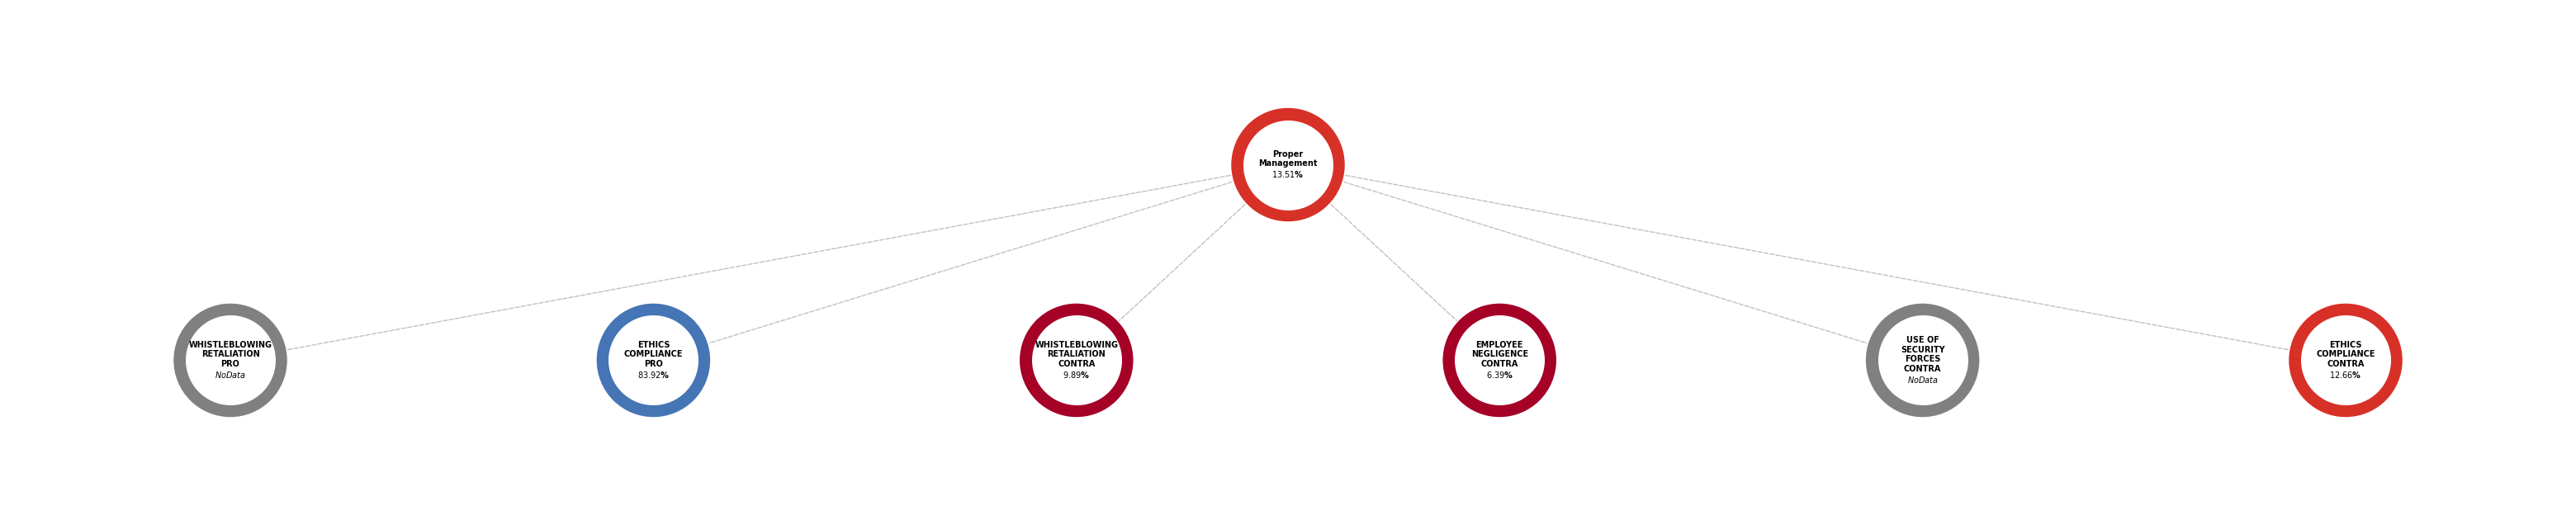

In [ ]:
bubble_plot_Subsub(csv_file, company_name, 'Proper_Management')

## Trend Graphs

In [ ]:

def time_calc(unix_time):
  #unix_time /= 1000
  year = unix_time/31536000
  rem = unix_time%31536000
  month = rem/2628288
  rem2 = month-np.trunc(month)
  if rem2>0.75:
    week = 3
  elif rem2>0.5:
    week = 2
  elif rem2>0.25:
    week = 1
  else:
    week = 0


  return [np.trunc(1970+year).astype(int), (np.trunc(month)+1).astype(int), week]

def trend_graph(input, start, length, company, categories, name):

  sep_time = [[] for i in range(4*length)]

  data = clean_data(input)

  #print(data)

  valid_month = []
  m = start[1]
  y = start[0]
  for i in range(length):
    if m+i<13:
      valid_month.append([y,m+i])
    else:
      valid_month.append([y+1, (m+i)%12])

  print(valid_month)

  for idx, row in data.iterrows():
    time = row['TIME']
    time = int(time)
    #print(time)
    ymw = time_calc(time)
    #print(ymw)
    if ymw[0:2] in valid_month:
      #print(ymw)
      if ymw[0] == start[0]:
        #print(4*(ymw[1]-start[1])+ymw[2])
        sep_time[4*(ymw[1]-start[1])+ymw[2]].append(row)
      else:
        #print(4*(12-start[1]+1)+4*(ymw[1]-1)+ymw[2])
        sep_time[4*(12-start[1]+1)+4*(ymw[1]-1)+ymw[2]].append(row)

  #print(sep_time)
  esg_vals = {}
  apc = {}
  for i in range(len(sep_time)):
    ent = []

    for j in range(i):
      ent += sep_time[j]
      #print(ent)
    df = pd.DataFrame(ent)
    #print(df)
    esg = calc_ESG(company, df)

    #print(esg)

    for cat in categories:
      if cat in esg_vals:
        esg_vals[cat].append(esg[cat])
      else:
        esg_vals[cat] = []
        esg_vals[cat].append(esg[cat])
      if cat in apc:
        if cat == 'Environment':
          apc[cat].append(esg['count']['GHG'] + esg['count']['Waste'] + esg['count']['Sustainability'] + esg['count']['Energy'] + esg['count']['Biodiversity'])
        elif cat == 'Social':
          apc[cat].append(esg['count']['Labor_Rights'] + esg['count']['Local_Support'] + esg['count']['Customer_Rights'] + esg['count']['Equality'])
        elif cat == 'Governance':
          apc[cat].append(esg['count']['Proper_Management'] + esg['count']['Political_Influence'] + esg['count']['Sustainability_Efforts'] + esg['count']['Anti_Corruption'])
        elif cat == 'ESG_Index':
          apc[cat].append(esg['count']['GHG'] + esg['count']['Waste'] + esg['count']['Sustainability'] + esg['count']['Energy'] + esg['count']['Biodiversity'] + esg['count']['Labor_Rights'] + esg['count']['Local_Support'] + esg['count']['Customer_Rights'] + esg['count']['Equality'] + esg['count']['Proper_Management'] + esg['count']['Political_Influence'] + esg['count']['Sustainability_Efforts'] + esg['count']['Anti_Corruption'])
        else:
          apc[cat].append(esg['count'][cat])
      else:
        apc[cat] = []
        if cat == 'Environment':
          apc[cat].append(esg['count']['GHG'] + esg['count']['Waste'] + esg['count']['Sustainability'] + esg['count']['Energy'] + esg['count']['Biodiversity'])
        elif cat == 'Social':
          apc[cat].append(esg['count']['Labor_Rights'] + esg['count']['Local_Support'] + esg['count']['Customer_Rights'] + esg['count']['Equality'])
        elif cat == 'Governance':
          apc[cat].append(esg['count']['Proper_Management'] + esg['count']['Political_Influence'] + esg['count']['Sustainability_Efforts'] + esg['count']['Anti_Corruption'])
        elif cat == 'ESG_Index':
          apc[cat].append(esg['count']['GHG'] + esg['count']['Waste'] + esg['count']['Sustainability'] + esg['count']['Energy'] + esg['count']['Biodiversity'] + esg['count']['Labor_Rights'] + esg['count']['Local_Support'] + esg['count']['Customer_Rights'] + esg['count']['Equality'] + esg['count']['Proper_Management'] + esg['count']['Political_Influence'] + esg['count']['Sustainability_Efforts'] + esg['count']['Anti_Corruption'])
        else:
          apc[cat].append(esg['count'][cat])


  plt.figure(figsize=(15, 10))
  time = np.linspace(0, length, 4*length)

  colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
  plt.subplot(2,2, 1)
  for idx, key in enumerate(esg_vals.keys()):
    plt.plot(time, esg_vals[key], label = key, color = colors[idx%6])
  s_month = start[1]
  months = []
  for i in range(start[1], start[1]+length+1):
    if i <13:
      months.append(str(i)+'/'+str(start[0])[2:4])
    else:
      months.append(str(i%13+1)+'/'+str(start[0]+1)[2:4])
  #print(esg_vals)
  #print(months)
  x_val = np.arange(length+1)

  plt.xticks(x_val, months)
  plt.xlabel('months')
  plt.ylabel(name + " Scores (%)")
  plt.legend()
  plt.title(company + '(past ' + str(length) + ' months)')
  plt.ylim(0, 110)

  plt.subplot(2,2,3)
  #print(apc)
  for idx, val in enumerate(apc.keys()):
    plt.plot(time, apc[val], label = "Articles in " + val, color = colors[idx%6])

  plt.xticks(x_val, months)
  plt.xlabel('months')
  plt.ylabel("# of Articles")
  plt.legend()
  plt.title('Total Articles over the past ' + str(length) + ' months')




{}


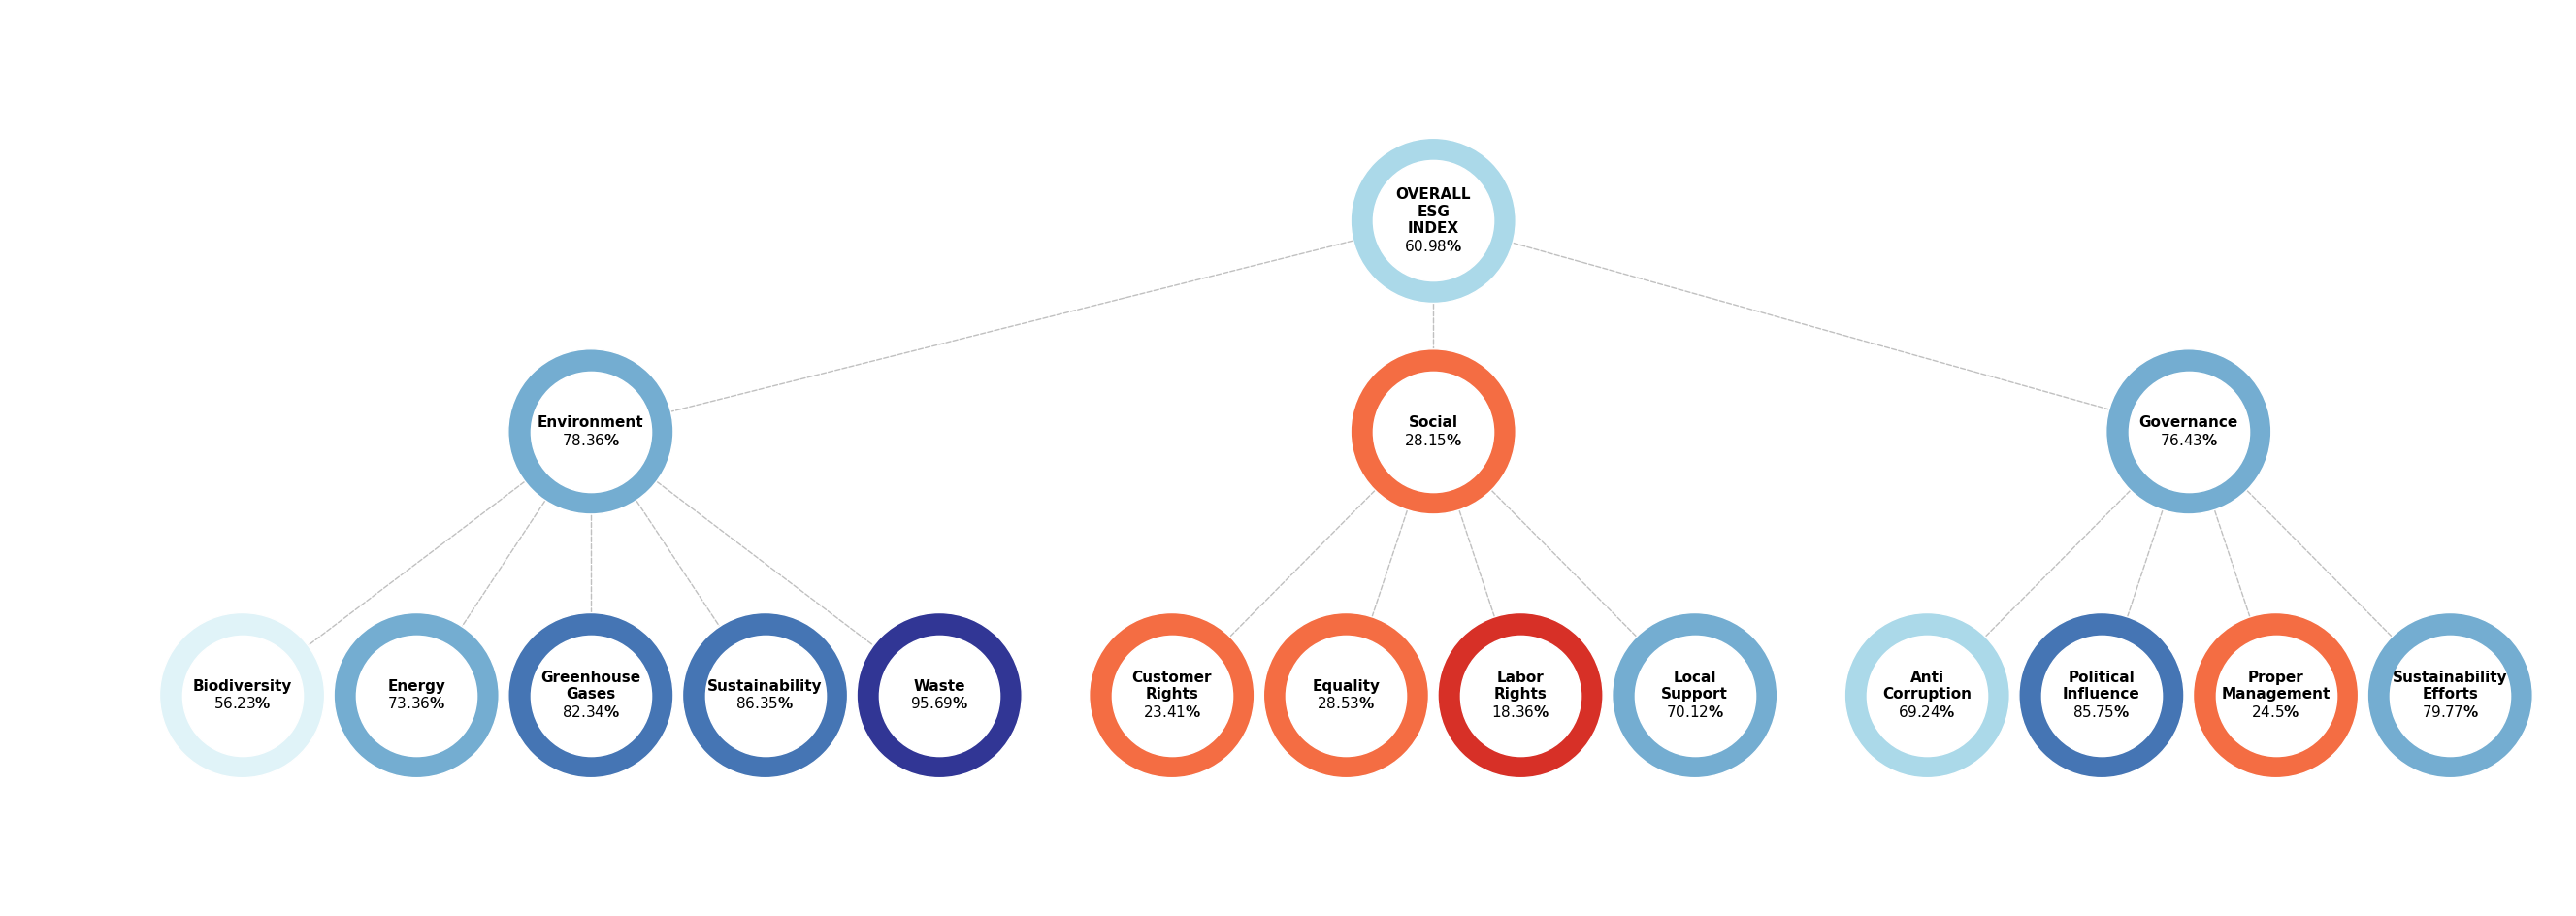

In [ ]:
bubble_plot(csv_file, company_name)

In [ ]:
bubble_plot_Sub(csv_file, company_name, 'E')

In [ ]:
bubble_plot_Sub(csv_file, company_name, 'S')

In [ ]:
bubble_plot_Sub(csv_file, company_name, 'G')

In [ ]:
trend_graph(csv_file, [2022, 7], 12, company_name, ['ESG_Index', 'Environment', 'Social', 'Governance'], "ESG")

In [ ]:
trend_graph(csv_file, [2022, 7], 12, company_name, ['GHG', 'Energy', 'Waste', 'Sustainability', 'Biodiversity'], "Environment")

In [ ]:
trend_graph(csv_file, [2022, 7], 12, company_name, ['Equality', 'Local_Support', 'Labor_Rights', 'Customer_Rights'], "Social")

In [ ]:
trend_graph(csv_file, [2022, 7], 12, company_name, ['Proper_Management', 'Sustainability_Efforts', 'Anti_Corruption', 'Political_Influence'], 'Governance')